In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# dataset_path = "/Users/alexho/Documents/Renaissance Engineering Programme (REP)/REP Year 4/REP Year 4 Semester 1/4032 Data Mining/terrorism_new.csv"
# full_dataset = pd.read_csv(dataset_path)

dataset_path = '/Users/gwynethang/Downloads/terrorism_new.csv'
dataset = pd.read_csv(dataset_path)

In [4]:
dataset = dataset[[
    'eventid','suicide','attacktype1_txt','weaptype1_txt','targtype1_txt','gname','nperps',
    'nkill','nwound','property','propextent','propvalue','region_txt'
]]

In [43]:
weap_targ = dataset[['eventid','targtype1_txt','weaptype1_txt']]\
.groupby(['targtype1_txt','weaptype1_txt'])['eventid']\
.count()\
.to_frame()\
.reset_index()
weap_targ = pd.pivot_table(weap_targ,values='eventid',index=['targtype1_txt'],columns=['weaptype1_txt'])
# weap_targ

In [27]:
weapons = list(weap_targ.columns)
targets = list(weap_targ.index)
counts = weap_targ.values
# counts

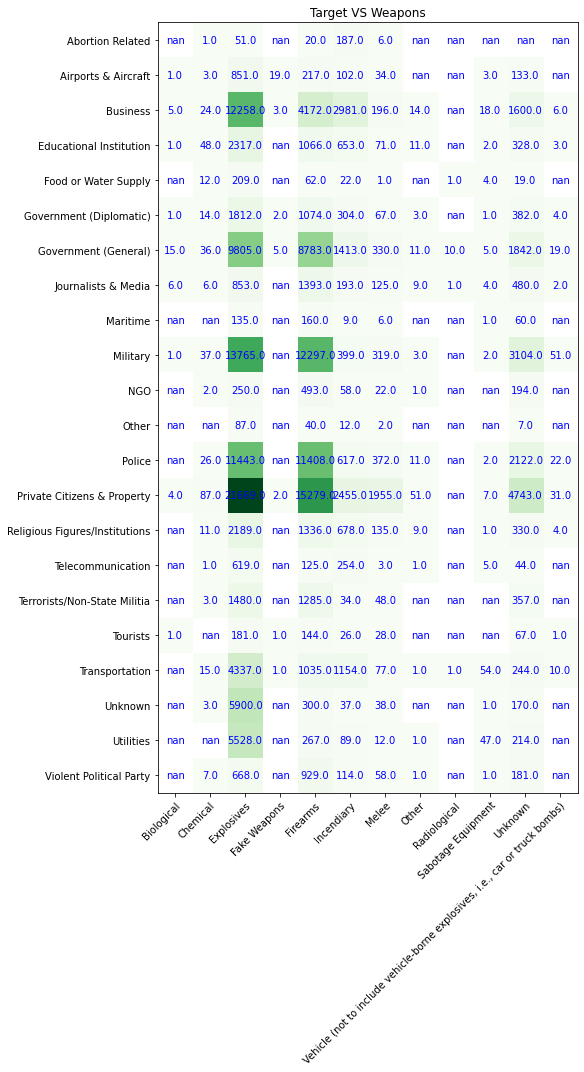

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(counts, cmap="Greens")

# We want to show all ticks...
ax.set_xticks(np.arange(len(weapons)))
ax.set_yticks(np.arange(len(targets)))
# ... and label them with the respective list entries
ax.set_xticklabels(weapons)
ax.set_yticklabels(targets)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(targets)):
    for j in range(len(weapons)):
        text = ax.text(j, i, counts[i, j],
                       ha="center", va="center", color="b")

ax.set_title("Target VS Weapons")
fig.tight_layout()
plt.show()


In [39]:
weap_attack = dataset[['eventid','attacktype1_txt','weaptype1_txt']]\
.groupby(['attacktype1_txt','weaptype1_txt'])['eventid']\
.count()\
.to_frame()\
.reset_index()
weap_attack = pd.pivot_table(weap_attack,values='eventid',index=['attacktype1_txt'],columns=['weaptype1_txt'])

In [40]:
weapons_a = list(weap_attack.columns)
attack = list(weap_attack.index)
counts_a = weap_attack.values

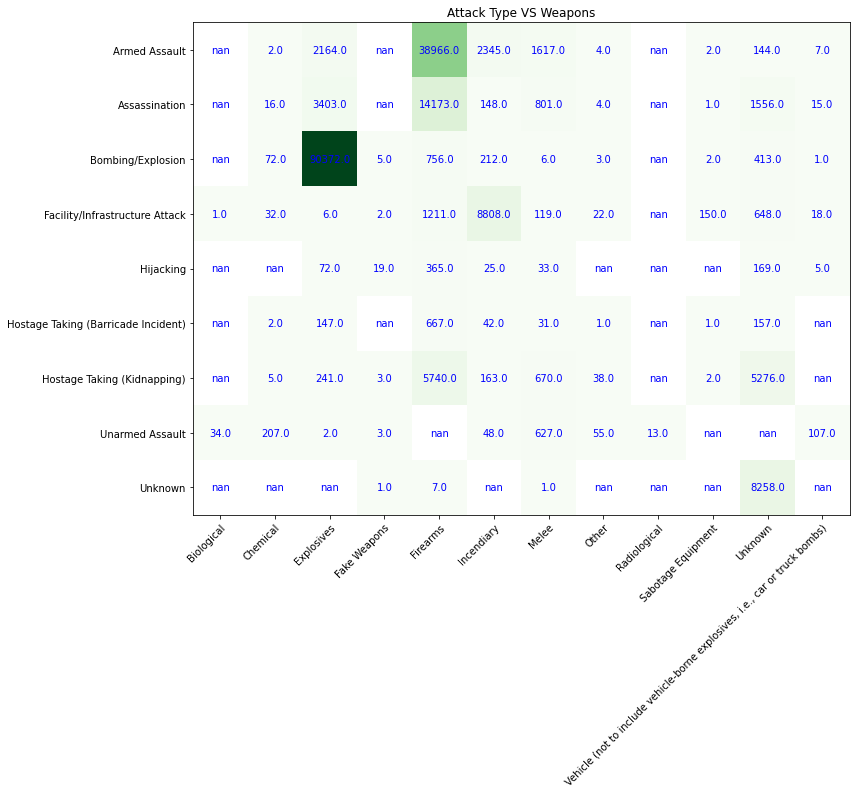

In [56]:
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(counts_a, cmap="Greens")

# We want to show all ticks...
ax.set_xticks(np.arange(len(weapons_a)))
ax.set_yticks(np.arange(len(attack)))
# ... and label them with the respective list entries
ax.set_xticklabels(weapons_a)
ax.set_yticklabels(attack)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(attack)):
    for j in range(len(weapons_a)):
        text = ax.text(j, i, counts_a[i, j],
                       ha="center", va="center", color="b")

ax.set_title("Attack Type VS Weapons")
fig.tight_layout()
plt.show()


In [45]:
weap_tgroup = dataset[['eventid','gname','weaptype1_txt']]\
.groupby(['gname','weaptype1_txt'])['eventid']\
.count()\
.to_frame()\
.reset_index()
weap_tgroup = pd.pivot_table(weap_tgroup,values='eventid',index=['gname'],columns=['weaptype1_txt'])
weap_tgroup.head()

weaptype1_txt,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
gname,,,,,,,,,,,,
1 May,NaN,NaN,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14 K Triad,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
14 March Coalition,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14th of December Command,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15th of September Liberation Legion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
weap_region = dataset[['eventid','region_txt','weaptype1_txt']]\
.groupby(['region_txt','weaptype1_txt'])['eventid']\
.count()\
.to_frame()\
.reset_index()
weap_region = pd.pivot_table(weap_region,values='eventid',index=['region_txt'],columns=['weaptype1_txt'])
# weap_region

In [50]:
weapons_r = list(weap_region.columns)
region = list(weap_region.index)
counts_r = weap_region.values

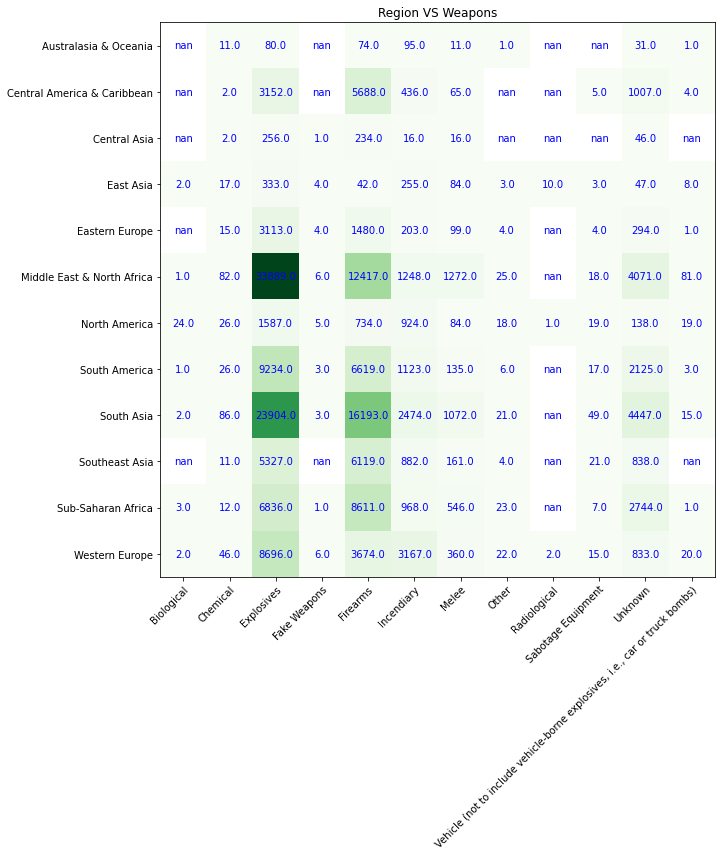

In [55]:
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(counts_r, cmap="Greens")

# We want to show all ticks...
ax.set_xticks(np.arange(len(weapons_r)))
ax.set_yticks(np.arange(len(region)))
# ... and label them with the respective list entries
ax.set_xticklabels(weapons_r)
ax.set_yticklabels(region)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(region)):
    for j in range(len(weapons_r)):
        text = ax.text(j, i, counts_r[i, j],
                       ha="center", va="center", color="b")

ax.set_title("Region VS Weapons")
fig.tight_layout()
plt.show()